In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stats

In [14]:
data = pd.read_csv('data_train.csv')

In [41]:
length = len(M)
ranking_count = np.zeros([length,2])

for i in range (-1,length-1):
    ranking_count[i,0] = np.count_nonzero(M[i,:])
    ranking_count[i,1] = i
    
col = 0
ranking_count = ranking_count[np.argsort(ranking_count[:, col])]
M_ordered = np.zeros((10000,1000))

for j in range (0,length):
    M_ordered[j,:] = M[int(ranking_count[j,1]),:]


In [43]:
def order_matrix(M):
    length = len(M)
    ranking_count = np.zeros([length,2])
    for i in range (-1,length-1):
        ranking_count[i,0] = np.count_nonzero(M[i,:])
        ranking_count[i,1] = i
    
    col = 0
    ranking_count = ranking_count[np.argsort(ranking_count[:, col])]
    M_ordered = np.zeros((10000,1000))
    
    for j in range (0,length):
        M_ordered[j,:] = M[int(ranking_count[j,1]),:]
        
    return(M_ordered)

In [45]:
def order_matrix_user(M):
    
    length = len(M)
    ranking_count = np.zeros([length,2])
    user = np.zeros(length)
    for i in range (-1,length-1):
        ranking_count[i,0] = np.count_nonzero(M[i,:])
        ranking_count[i,1] = i
    
    col = 0
    ranking_count = ranking_count[np.argsort(ranking_count[:, col])]
    M_ordered = np.zeros((10000,1000))
    
    for j in range (0,length):
        M_ordered[j,:] = M[int(ranking_count[j,1]),:]
     
    user = ranking_count[:,1]
    return(M_ordered, user)

In [89]:
def ordered_matrix_to_data_frame(M_ordered, user):
    
    n_rows = len(M_ordered)
    n_columns = len(M_ordered[0])
    non_zero = np.count_nonzero(M_ordered)
    sep = '_'
    cells = ["" for x in range(non_zero)]
    predictions = ["" for x in range(non_zero)]
    
    counter = 0
    for i in range(0,n_columns):
        for j in range(0,n_rows):
            if M_ordered[j,i] != 0:
                cells[counter] = 'r' + str(int(user[j])) + sep + 'c' + str(i+1)
                predictions[counter] = int(M_ordered[j,i])
                counter = counter + 1
    
    d = {'Id': cells, 'Prediction': predictions}
    df = pd.DataFrame(data=d) 
    return df

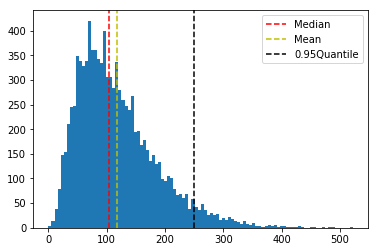

In [27]:
q = 0.95
plt.hist(n_ratings, bins = 100)
plt.axvline(stats.median(n_ratings), color = 'r', linestyle = 'dashed')
plt.axvline(np.mean(n_ratings), color = 'y', linestyle = 'dashed')
plt.axvline(np.quantile(n_ratings, q), color = 'k', linestyle = 'dashed')
plt.legend(('Median', 'Mean', str(q) + 'Quantile'))
plt.show()

In [3]:
def data_frame_to_matrix(data):
    #n=2 limits the output to two items
    id_splited = data['Id'].str.split('_', n=2, expand = True)
    data['User'] = id_splited[0].str.extract('(\d+)', expand = True)
    data['Movie'] = id_splited[1].str.extract('(\d+)', expand = True)
    M = np.zeros((10000,1000))
    length = len(data)
    for i in range(0, length):
        user_id = int(data.iloc[i,2])
        movie_id = int(data.iloc[i,3])
        rating = data.iloc[i,1]
        M[user_id - 1, movie_id -1] = rating
    return M

In [15]:
M = data_frame_to_matrix(data)

In [5]:
def matrix_to_data_frame(M):
    n_rows = len(M)
    n_columns = len(M[0])
    non_zero = np.count_nonzero(M)
    sep = '_'
    cells = ["" for x in range(non_zero)]
    predictions = ["" for x in range(non_zero)]
    counter = 0
    for i in range(0,n_columns):
        for j in range(0,n_rows):
            if M[j,i] != 0:
                cells[counter] = 'r' + str(j+1) + sep + 'c' + str(i+1)
                predictions[counter] = M[j,i]
                counter = counter + 1
    
    d = {'Id': cells, 'Prediction': counter}
    df = pd.DataFrame(data=d) 
    return df

In [ ]:
def matrix_to_data_frame(M):
    n_rows = len(M)
    n_columns = len(M[0])
    non_zero = np.count_nonzero(M)
    sep = '_'
    cells = ["" for x in range(non_zero)]
    predictions = ["" for x in range(non_zero)]
    counter = 0
    for i in range(0,n_columns):
        for j in range(0,n_rows):
            if M[j,i] != 0:
                cells[counter] = 'r' + str(j+1) + sep + 'c' + str(i+1)
                predictions[counter] = M[j,i]
                counter = counter + 1
    
    d = {'Id': cells, 'Prediction': counter}
    df = pd.DataFrame(data=d) 
    return df